### Линейная регрессия

Теперь у нас есть общее понимание процесса обучения линейной регрессии. 

1) У нас есть данные (пиксили изображения, площадь дома и т д) которые мы обозначим как X.<br>
2) Формула для поиска целевой переменной $ f = W*X + b $<br>
3) Нам надо найти $W$ и $b$<br>
3.5) Нам не нравится, что  $ f = W*X + b $ даёт ответы от $-\inf$ до $\inf$. Вводим понятие сигмойды $\phi(z) = \dfrac{1}{1 + e^{-z}}$ Теперь диапазон наших ответов $\{0, 1\}$<br>
4) Выбираем $W = 0$, считаем ошибку $L = \sum_i(y_i - \phi(z))^2$. Ошибка всегда положительна.<br>
5) При помощи градиентного спуска (производной) находим влияние каждого веса $W$ на ошибку $L$.<br>
6) Применяем формулу градиентного спуска  $w_i = w_i - \alpha* \frac{d}{dw_i}L(w) $. Изменяем веса, чтобы уменьшить ошибку.<br>
7) Считаем ошибку с обновлёнными весами.<br>
8) Повторяем пункты 5-6-7 1000 (0000000) раз. При каждом повторении (итерации) наша ошубка будет чуть уменьшаться.<br>
9) Теперь у нас есть настроенные веса $W$ и $b$. Теперь мы можем классифицировать новые данные при помощи формулы $ f = W*X + b $<br>
10) Мы великолепны.

Наша цель сегодня определить рукописные цифры с изображения. Задача классификации (ответ 0-1-...-9). Датасет выглядит подобным образом.

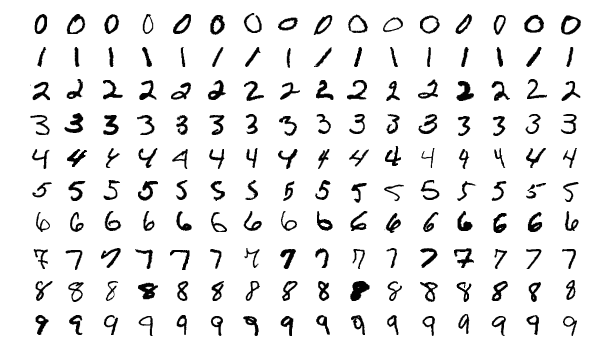

In [39]:
from IPython.display import Image
Image(filename='img/l3_6.png')

Нам нехватает ещё нескольких аспектов, чтобы выполнить эту задачу.

Вспомним как выглядит изображение с точки зрения машины.

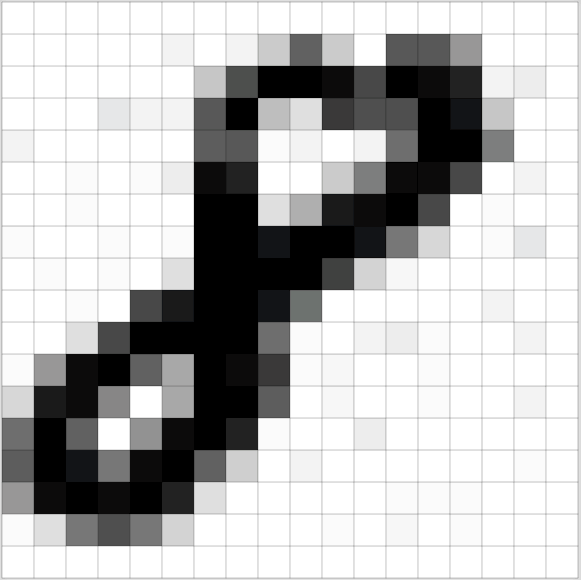

In [40]:
Image(filename='img/l3_4.gif')

Матрица числел размером 28х28, это и есть наши входные значения Х. Но с матрицей нам работать не очень удобно, мы вытянем её в 
один вектор длинной 784 (28*28). Теперь понятно что Х это вектор длинной 728 элементов (запишем его размерность как 728х1). Но в нашей формуле $ f = W*X + b $ мы умножаем этот вектор на $W$. И было бы странно представить W как число, тогда каждый наш пиксель имел одинаковый вес для ответа, мы же хотим чтобы каждый пиксель оценивался отдельно. Значит и W должно иметь 728  значений (запишем размерность как 1х728). Вспомним правила умножения векторов и матриц 
<center>(1х728) * (728х1) = (1х1)</center>
(1x1) это просто число (скаляр), что и было бы нашим ответом, но у нас 10 классов мы хотим, чтобы каждое изображение оценивалось на отношение к 10 классам. Значит наши веса W должны выглядеть иначе, не 1х728, а 10х728, тогда 
<center>(10х728) * (728х1) = (10х1)</center>
мы получили вектор 10х1, который можно интерпретировать так:<br>
[<br>
\*Насколько это 0\*<br>
\*Насколько это 1\*<br>
\*Насколько это 2\*<br>
\*Насколько это 3\*<br>
\*Насколько это 4\*<br>
\*Насколько это 5\*<br>
\*Насколько это 6\*<br>
\*Насколько это 7\*<br>
\*Насколько это 8\*<br>
\*Насколько это 9\*<br>
]<br>

Посмотрим на упрощённый пример. Где изображение (якобы) 2х2 пикселя мы классифицируем одним из 3-х классов.

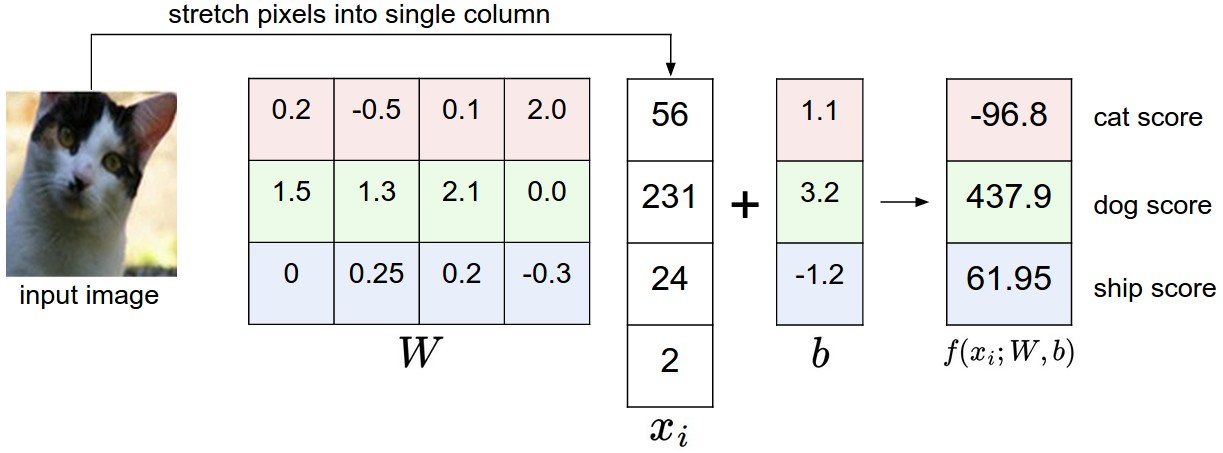

In [41]:
Image(filename='img/l4_1.jpg')

В данном примере веса W не настроенны и мы видим, что классификатор думает, что это скорее собака, чем кот.

Каждый пиксель исходного изображения имеет разный вес для каждого класса. 

Здесь самое время освежить у себя в памяти правила перемножения матриц и векторов. Самое важное для нас, как взаимодействуют размерности матриц. (a x b) * (b x c) = (a x c). Лучше найти материал по этой теме и потратить 5 минут на пару примеров.

 Когда у нас была бинарная классификация (2 возможных класса), мы пользовались сигмойдой, чтобы нормализовать оценку класса и получить её в пределах от 0 до 1. Где 0 - это класс1, 1 - класс2.

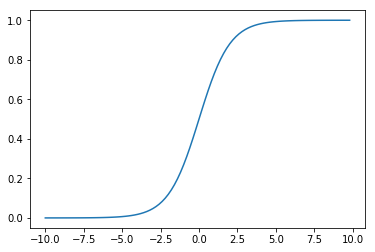

In [42]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
def sigmoid(x):
    a = []
    for item in x:
        a.append(1/(1+np.exp(-item)))
    return a

x = np.arange(-10., 10., 0.2)
sig = sigmoid(x)
plt.plot(x,sig)

plt.show()

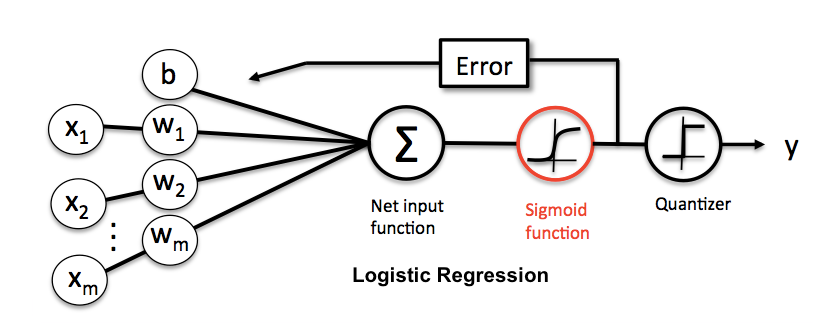

In [43]:
Image(filename='img/l4_2.png')

Теперь же у нас есть 10 оценок, по одной для каждого из классов и сигмойда уже не сработает

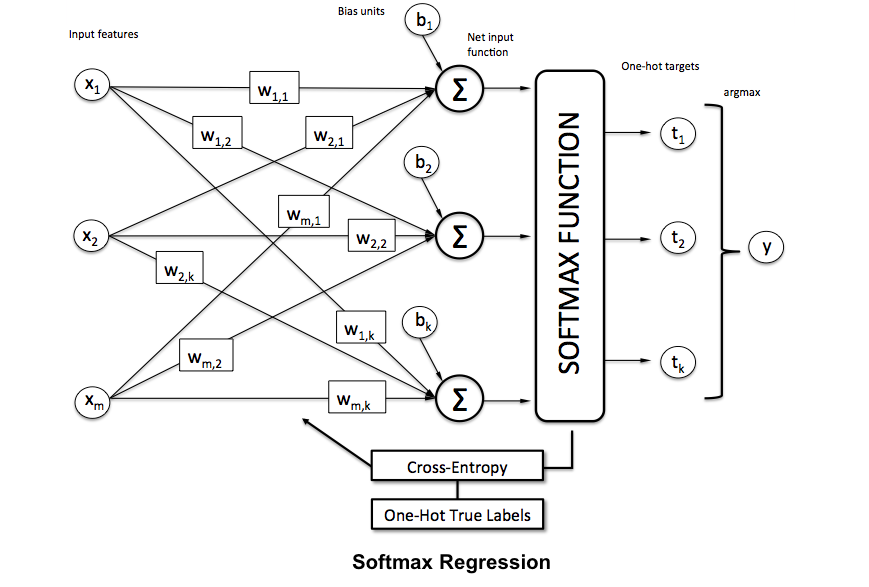

In [44]:
Image(filename='img/l4_3.png')

<h3>$L_i = -\log\left(\frac{e^{f_{y_i}}}{ \sum_j e^{f_j} }\right) \hspace{0.5in} \text{or equivalently} \hspace{0.5in} L_i = -f_{y_i} + \log\sum_j e^{f_j}$</h3>

Softmax это сигмойда, только преобразованная для мульти-классификации (более чем 2 класса). Сумма всех классов, так же как и в случае с сигмойдов, равна 1.

Посмотрим пример изменения поведения функции тут http://neuralnetworksanddeeplearning.com/chap3.html#softmax (чуть вниз прокрутить для интерактивного примера)

Общий процесс классификации в нашем случае выглядит вот так.

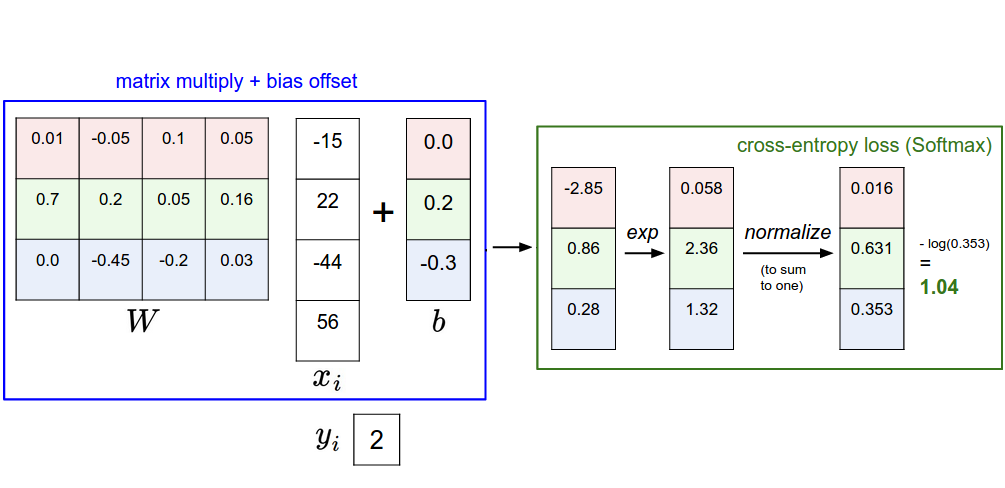

In [45]:
Image(filename='img/l4_4.png')

## Практика

Уря, с теорией поконченно, гоу классифицировать картиночки.

In [388]:
import os
import pickle
import gzip
import random
import pandas as pd
import numpy as np

Загружаем датасет с изображениями

In [389]:
mnist_data = os.path.join('data', 'mnist.pkl.gz')

In [391]:
((X, y), (x_valid, y_valid), _) = pickle.load(gzip.open(mnist_data, 'rb'), encoding='latin-1')

Внимание! Ошибка. X я использую как train set. Но x_valid входит в X, необходимо разбить X на X_train и X_valid непересекающиеся

In [425]:
if x_valid[0,:] in X:
    print('Пример из x_valid находится в X')

Пример из x_valid находится в X


Проверяем размерность параметров

In [392]:
type(X), X.shape, type(y), y.shape

(numpy.ndarray, (50000, 784), numpy.ndarray, (50000,))

In [393]:
num_ex = X.shape[0]
num_pix = X.shape[1]

Вспомогательные функции, чтобы отобразить изображения

In [376]:
def show(img, title=None):
    plt.imshow(img, cmap="gray")
    if title is not None: plt.title(title)
def plots(ims, figsize=(12,6), rows=2, titles=None):
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None: sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], cmap='gray')

In [377]:
x_valid.shape

(10000, 784)

Сейчас каждое изображение вытянуто в линию 784 пикселя, чтобы посмотреть на изображение надо сформировать из них квадраты 28х28

In [378]:
x_imgs = np.reshape(x_valid, (-1,28,28)); x_imgs.shape

(10000, 28, 28)

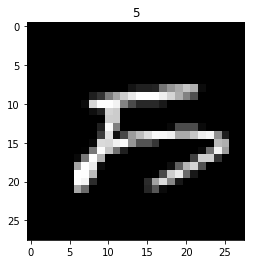

In [402]:
n = random.randint(0, 10000)
show(x_imgs[n], y_valid[n])

Можем посмотреть на часть изображения

In [403]:
x_imgs[n,10:15,10:15]

array([[0.9921875 , 0.953125  , 0.515625  , 0.29296875, 0.16015625],
       [0.82421875, 0.796875  , 0.        , 0.        , 0.        ],
       [0.80078125, 0.796875  , 0.        , 0.        , 0.        ],
       [0.98046875, 0.5       , 0.        , 0.        , 0.        ],
       [0.88671875, 0.06640625, 0.28125   , 0.609375  , 0.734375  ]],
      dtype=float32)

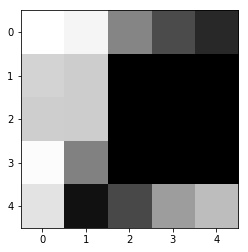

In [405]:
show(x_imgs[n,10:15,10:15])

Зададим количество классов

In [406]:
num_classes = 10

Инициализируем веса нулями

In [407]:
W = np.zeros([num_pix, num_classes])

Инициализируем баейс нулями

In [408]:
b = np.zeros([num_classes])

Теперь у нас есть всё необходимое, чтобы посчитать ошибку.

In [385]:
def softmax(all_scores, y):
    sum_exp = np.sum(np.exp(all_scores))
    correct_exp = np.exp(all_scores[y])
    return -1*np.log(correct_exp / sum_exp)

def naive_feedforward(X, W, b, y):
    loss = 0
    matmul = np.dot(X, W) + b
    for i in range(num_ex):
        loss += softmax(matmul[i, :], y[i])
    
    loss /= num_ex
    return loss

Проверяем размерности

In [386]:
X.shape, W.shape, b.shape, y.shape

((50000, 784), (784, 10), (10,), (50000,))

In [409]:
naive_feedforward(X, W, b, y)

2.3025850929956113

Ошибка есть, теперь нам надо её уменьшить. Мы знаем как. Надо посчитать градиент ошибки для весов W.

Только удобнее считать градиент сразу при подсчёте ошибки, чтобы можно было использовать промежуточные вычисления эффективнее.

In [288]:
def feedforward_with_back(X, W, b, y):
    # Форма производных должна всегда совпадать с формой целевой переменной
    dW = np.zeros_like(W)
    loss = 0
    num_ex = X.shape[0]
    for i in range(num_ex):
        scores = X[i].dot(W)
        scores_exp = np.exp(scores)
        loss += -scores[y[i]] + np.log(np.sum(scores_exp))
        for j in range(num_classes):
            dW[:,j] += (scores_exp[j] / np.sum(scores_exp) ) * X[i]
            if j == y[i]:
                dW[:,j] -= X[i] 
        
    dW /= num_ex
    loss /= num_ex
    
    return loss, dW

In [233]:
loss, gradient = feedforward_with_back(X, W, b, y)

Проверим, что форма градиента и весов совпадает.

In [238]:
W.shape, gradient.shape

((784, 10), (784, 10))

Попробуем обучить веса при помощи градиентного спуска
<h3><center> $w_i = w_i - \alpha* \frac{d}{dw_i}L(w_i) $ </center></h3>

Можно поиграть с параметром lr и посмотреть как изменяется результат.

In [236]:
%%time
lr = 0.01
num_iters=5
W = np.zeros([num_pix, num_classes])
b = np.zeros([num_classes])
for i in range(num_iters):
    loss, gradient = feedforward_with_back(X, W, b, y)
    W -= lr * gradient
    print(f'loss is {loss}')
    

loss is 2.3025850929956113
loss is 2.2919675267900583
loss is 2.281452660439381
loss is 2.2710373898665233
loss is 2.260718846451266
Wall time: 1min 15s


Супер медленная работа. Это не удивительно у нас 50000 изображений, в каждом по 784 пикселя, для наших 784 параметров. В современных нейронных сетях бывают сотни миллионов весов, обучение таких сетей заняло бы вечность. Много вычислений, да ещё и алгоритм у нас не оптимизирован. 5 итераций заняли больше минуты, а потребуется их 1000

##### Stochastic Gradient Descent

В ванильной версии градиентного спуска мы просчитываем градиент для каждого примера в обучающей выборке и только после этого делаем шаг по изменению весов. Но исходные изображения имеют сильную корреляцию внутри классов, по этому нет смысла обсчитывать все варианты. Стохастический градиентный спуск берёт только небольшое количество примеров из обучающей выборки и считает градиент только для них, после чего сразу изменяет веса W. 

Попробуем брать не 50000 изображей, а по 200 изображений (батч), считать для них градиент, а зачем брать следующие 200 изображений и так далее.

In [353]:
random_rows = np.random.choice(num_ex, size=batch_size)
X_batch = X[random_rows, :]

batch_size и num_iters параметры с которыми можно поиграть и посмотреть как изменяется результат.

In [410]:
%%time
batch_size = 200
num_iters = 500
W = np.zeros([num_pix, num_classes])
b = np.zeros([num_classes])
for i in range(num_iters):
    random_rows = np.random.choice(num_ex, size=batch_size)
    X_batch = X[random_rows, :]
    y_batch = y[random_rows]
    loss, gradient = feedforward_with_back(X_batch, W, b, y_batch)
    W -= lr * gradient
    print(f'loss is {loss}')

loss is 2.3025850929940392
loss is 2.290565782983602
loss is 2.2778870105964293
loss is 2.2697606009191342
loss is 2.2651940387185485
loss is 2.246870144483694
loss is 2.237346582945851
loss is 2.228670157787992
loss is 2.2181619883466044
loss is 2.2075846796079333
loss is 2.2035404463527377
loss is 2.1937429527501604
loss is 2.178174413744602
loss is 2.1730693931143086
loss is 2.158190673925532
loss is 2.1493604714129804
loss is 2.1382663177063184
loss is 2.1376244322072626
loss is 2.1418926569997785
loss is 2.111346415963796
loss is 2.0920933354783977
loss is 2.0999189261432996
loss is 2.080222461911894
loss is 2.0813058067605
loss is 2.0761481290925596
loss is 2.054921554300815
loss is 2.06883681260965
loss is 2.053262845135897
loss is 2.0216845634888636
loss is 2.0199068477852267
loss is 2.0077384790319077
loss is 2.009397641706838
loss is 1.9902812401867114
loss is 2.0078596932852335
loss is 1.9603534299049468
loss is 1.9923739595798342
loss is 2.005208146805821
loss is 1.95880090

loss is 0.9946467620019133
loss is 0.9961170257001654
loss is 1.0197839613494786
loss is 1.0158096341949072
loss is 1.032713552445646
loss is 0.9787470671403212
loss is 0.9605443695152256
loss is 0.9761641320288255
loss is 0.9520574459066338
loss is 0.9376878493725759
loss is 0.9728744459141904
loss is 0.9525922427152986
loss is 0.9047500336444816
loss is 0.9581198965656967
loss is 1.0770733152061973
loss is 1.0214491766506724
loss is 1.0407945467258057
loss is 1.01080575284904
loss is 0.9397672683388865
loss is 1.0052396820629084
loss is 0.9905463345465223
loss is 1.005614177301885
loss is 0.9954345100053666
loss is 1.0122319138283578
loss is 0.9324578941772547
loss is 0.9682648307271394
loss is 0.9988865788513427
loss is 0.9739241065226095
loss is 0.980170672035389
loss is 1.0342798477965098
loss is 1.0263068016776078
loss is 1.0263405657459597
loss is 1.0156612795113766
loss is 1.001145231382877
loss is 0.9281491005987667
loss is 0.9963540453872416
loss is 0.9715075897896781
loss is

Значительно лучше, теперь у нас уже есть обученные веса. Значит мы хотим уметь предсказывать!

In [411]:
def predict(X, W):
    scores = X.dot(W)
    scores = np.reshape(scores, (-1, 10))
    return np.argmax(scores, axis=1)

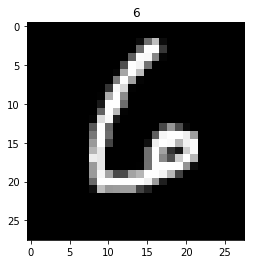

In [414]:
n = 2
show(x_imgs[n], y_valid[n])

Предскажем категорию для одного изображения

In [415]:
predict(x_valid[n,:], W)

array([6], dtype=int64)

Предскажем категорию для всего валидационного сета

In [416]:
predict(x_valid, W)

array([3, 8, 6, ..., 5, 6, 8], dtype=int64)

Теперь мы можем посчитать точность нашего классификатора. Применим для этого метрику accuracy. Которая выглядит так
<center><h3>$\text{Accuracy} = \frac{\text{Number of correct predictions}}{\text{Total number of predictions}}$</h3></center>

In [417]:
from sklearn.metrics import accuracy_score
accuracy_score(y_valid, predict(x_valid, W))

0.8567

Совсем неплохой результат, по сравнению с нашими изначальными 15%, когда мы угадывали W.

Теперь у нас есть веса которые довольно хорошо справляются с задачей классификации. Но есть один нюанс. Наш набор параметров W не уникален. Может быть сколько угодно очень похожих наборов весов, которые так же справлялись бы с задачей классификации. Самый простой способ увидеть это, представить что существует набор параметров $\lambda W$ где $\lambda > 1$. Умножение наших весов на константу не изменит результата. Только увеличит абсолютную разницу между ними. 

Мы бы хотели сделать так, чтобы у нас был предпочитаемый набор параметров, для этого мы введём понятие <b>регуляризации $R(W)$</b>. Мы хотим, чтобы наши веса были настолько маленькими, насколько это возможно, значит мы будем добавлять в ошибку сумму всех весов.
<center><h3>$R(W) = \sum_k\sum_l W_{k,l}^2$</h3></center>

Заметьте, что функция регуляризации, это не функция от данных, она зависит только от весов.

Теперь наша полная функция ошибки выглядит так
<center><h3>$L =  \underbrace{ \frac{1}{N} \sum_i L_i }_\text{data loss} + \underbrace{ \lambda R(W) }_\text{regularization loss} \\\\  $</h3></center>

Попробуем реализовать это в коде

Тут можно поменять пармаетр reg и понаблюдать за изменениями в процессе обучения и содержанием вектора W.

In [361]:
def feedforward_with_back(X, W, b, y, reg=0.001):
    # Форма производных должна всегда совпадать с формой целевой переменной
    dW = np.zeros_like(W)
    loss = 0
    num_ex = X.shape[0]
    for i in range(num_ex):
        scores = X[i].dot(W)
        scores_exp = np.exp(scores)
        loss += -scores[y[i]] + np.log(np.sum(scores_exp))
        for j in range(num_classes):
            dW[:,j] += (scores_exp[j] / np.sum(scores_exp) ) * X[i]
            if j == y[i]:
                dW[:,j] -= X[i] 
        
    dW /= num_ex
    dW += 2 * reg * W
    loss /= num_ex
    loss += reg * np.sum(W*W)
    
    return loss, dW

In [364]:
%%time
batch_size=200
num_iters = 500
W = np.zeros([num_pix, num_classes])
b = np.zeros([num_classes])
for i in range(num_iters):
    random_rows = np.random.choice(num_ex, size=batch_size)
    X_batch = X[random_rows, :]
    y_batch = y[random_rows]
    loss, gradient = feedforward_with_back(X_batch, W, b, y_batch)
    W -= lr * gradient
    print(f'loss is {loss}')

loss is 2.3025850929940392
loss is 2.2929768778775825
loss is 2.2818741033788306
loss is 2.2699925709346065
loss is 2.254945112133167
loss is 2.2494334190390446
loss is 2.243566814084394
loss is 2.2251351112810656
loss is 2.2150881049108957
loss is 2.2102717406125523
loss is 2.189794586889263
loss is 2.1847294928203067
loss is 2.1852587216160617
loss is 2.1686182053983716
loss is 2.163890157315928
loss is 2.1532859667324478
loss is 2.1312022911046586
loss is 2.125779569379736
loss is 2.113427844617008
loss is 2.109764558684651
loss is 2.088809948112687
loss is 2.1139748775213536
loss is 2.0965986403177634
loss is 2.07989808137413
loss is 2.0788305507203138
loss is 2.0671481791469337
loss is 2.0437975089254574
loss is 2.0367635100555574
loss is 2.0233453972387205
loss is 2.02953898204386
loss is 2.023708742628197
loss is 1.99762471749172
loss is 1.982632279192896
loss is 1.976409428433407
loss is 1.9946211557767148
loss is 1.988674344007682
loss is 1.9623319856279837
loss is 1.948348005

loss is 0.9384082642803182
loss is 1.0635489300699992
loss is 1.0731242377045072
loss is 1.0505491442339414
loss is 0.9869702882248514
loss is 1.0460656926454
loss is 0.9995186600352887
loss is 1.0407619656287144
loss is 0.9442247440061022
loss is 0.9700709442716023
loss is 0.9866557424767018
loss is 0.9737217976144487
loss is 1.0028973648231831
loss is 0.9899281676046998
loss is 0.9964481431591895
loss is 1.006770306040943
loss is 0.959988417540282
loss is 1.020112822237942
loss is 1.001226297278917
loss is 0.9893890307163711
loss is 0.9715886987058054
loss is 1.0098984494299683
loss is 0.9435121556394616
loss is 0.9687938673460808
loss is 0.9863001460162949
loss is 0.9324688138020323
loss is 0.9837303631589135
loss is 1.013909010091838
loss is 0.9970370815725885
loss is 0.9677035779262568
loss is 1.00901443066843
loss is 0.9680457034764706
loss is 1.01973587222708
loss is 0.9670144269002444
loss is 0.9684955588544747
loss is 0.9353921555786645
loss is 0.8964130981496261
loss is 0.980

loss is 0.710682250203534
loss is 0.7204335553124418
loss is 0.7775335557089952
loss is 0.7472551848368014
loss is 0.7721949349097545
loss is 0.6824356872204003
loss is 0.7044394397846276
loss is 0.792803253491313
loss is 0.724911882971328
loss is 0.7057837465856082
loss is 0.6745455739864078
loss is 0.7356570219612183
loss is 0.7352125113617132
loss is 0.7933518077173174
loss is 0.7641297249153134
loss is 0.8095807751962463
loss is 0.7936536682692686
loss is 0.7451389184709019
loss is 0.7284168015157931
loss is 0.758074751723028
loss is 0.773352276842063
loss is 0.8155491241586814
loss is 0.7444689916718928
loss is 0.7191809497153773
loss is 0.7519869682122591
loss is 0.7324870803153275
loss is 0.7439720501175937
loss is 0.7598447052741275
loss is 0.7635336657312771
loss is 0.6958509445420079
loss is 0.7063389169666399
loss is 0.7441976381719008
loss is 0.7207573249560935
loss is 0.6376971102829183
loss is 0.6800968391942818
loss is 0.7553953366262204
loss is 0.7737420704742384
loss i

loss is 0.650710816380681
loss is 0.676799048560698
loss is 0.6025289866640989
loss is 0.6916461779396776
loss is 0.616083406603722
loss is 0.6185355910848436
loss is 0.6139486952649462
loss is 0.726589341402721
loss is 0.614310819578241
loss is 0.7443794680002633
loss is 0.6215272785847877
loss is 0.6107268136965954
loss is 0.6237825863312115
loss is 0.6289437643326873
loss is 0.6573231105467362
loss is 0.6293745073371687
loss is 0.6414674691856667
loss is 0.6049064720349917
loss is 0.5302289419346172
loss is 0.664785108748342
loss is 0.6864215575148034
loss is 0.6236881519544768
loss is 0.6197739656649666
loss is 0.6328941161910494
loss is 0.6297969657236625
loss is 0.674517569512304
loss is 0.6499189466263247
loss is 0.5217947031542389
loss is 0.6646059470331075
loss is 0.7038770761933902
loss is 0.6588098134313604
loss is 0.7115852559025277
loss is 0.6418799859988344
loss is 0.6381316310808604
loss is 0.6794776540414612
loss is 0.6608358501446554
loss is 0.607154684686358
loss is 0

loss is 0.5708022511942715
loss is 0.5894069755602179
loss is 0.5623863506818544
loss is 0.5440630313991212
loss is 0.5877978640730259
loss is 0.5126917295732126
loss is 0.5636696706710569
loss is 0.6072283055548382
loss is 0.53491354158553
loss is 0.5496682550631001
loss is 0.5398409864838082
loss is 0.6309573327318774
loss is 0.6403132476990905
loss is 0.5561742918124167
loss is 0.6107745440034779
loss is 0.6216076534431143
loss is 0.5997463917539674
loss is 0.48038302123084364
loss is 0.5892192710751925
loss is 0.5621859330855911
loss is 0.5873784684935711
loss is 0.5809724363096945
loss is 0.6377918651982786
loss is 0.5881466395630085
loss is 0.5483370651064579
loss is 0.5331875361897742
loss is 0.6182532223345306
loss is 0.5613175434299137
loss is 0.6511780979091818
loss is 0.6581548860858614
loss is 0.5623650172438085
loss is 0.5502704734726155
loss is 0.6124202859416655
loss is 0.5614589602864455
loss is 0.6001268329550783
loss is 0.556351568013606
loss is 0.6296486758746368
los

loss is 0.6049036755175287
loss is 0.5788137388946276
loss is 0.5197955437451376
loss is 0.5121849736163279
loss is 0.6295405041815989
loss is 0.5306265690333009
loss is 0.5955148671263888
loss is 0.5905586017621243
loss is 0.591219175235679
loss is 0.6024035152969219
loss is 0.47593127473487007
loss is 0.49317727513424525
loss is 0.5700452477359574
loss is 0.5086299108967417
loss is 0.5506506537148199
loss is 0.4803149947820318
loss is 0.5476455261155769
loss is 0.5162007971694015
loss is 0.6329582660772627
loss is 0.4787173695557891
loss is 0.5922068044601662
loss is 0.536184771763227
loss is 0.5246753066429808
loss is 0.6364478856475196
loss is 0.5934426525265636
loss is 0.49589044531474435
loss is 0.57317641231218
loss is 0.44569870818803253
loss is 0.6435136844632867
loss is 0.5778283054200797
loss is 0.5700937948717468
loss is 0.5655548947943098
loss is 0.5597869905858492
loss is 0.5633535880487378
loss is 0.5731088935293542
loss is 0.5095427644058468
loss is 0.6391214510776961
l

loss is 0.5564716107116596
loss is 0.4983256229578511
loss is 0.6034328715446896
loss is 0.47078564122540545
loss is 0.5883909608668163
loss is 0.5405285113833063
loss is 0.5684805005437028
loss is 0.555872976569717
loss is 0.6029321617415285
loss is 0.5597357290704328
loss is 0.6127697189772214
loss is 0.4713961545880703
loss is 0.5345666720000648
loss is 0.47755045190443796
loss is 0.4632339791192157
loss is 0.5773347214940077
loss is 0.5973661528844366
loss is 0.6300913080251224
loss is 0.5800783626179676
loss is 0.5343477403307777
loss is 0.5041783321643244
loss is 0.5130224476692857
loss is 0.564870736862132
loss is 0.4359269327922273
loss is 0.4690747550349051
loss is 0.4837252578074975
loss is 0.47225260186008355
loss is 0.5697107287988006
loss is 0.519387079199569
loss is 0.5561427196934533
loss is 0.5795910992753092
loss is 0.5272504051750395
loss is 0.5413504882838387
loss is 0.5401107442565805
loss is 0.42866968871260264
loss is 0.6284781624259499
loss is 0.6326684220821309


loss is 0.5434447160887464
loss is 0.5919844627972086
loss is 0.5083022010112719
loss is 0.55647041010779
loss is 0.5075349781791305
loss is 0.5458857956264004
loss is 0.5830581836866506
loss is 0.5067609640028476
loss is 0.47061679648004734
loss is 0.516738510936123
loss is 0.49118073848201027
loss is 0.5661999414716944
loss is 0.529915582823434
loss is 0.4905847145708396
loss is 0.566716196871114
loss is 0.4990945091297717
loss is 0.534531308105224
loss is 0.509728116991449
loss is 0.640954029500134
loss is 0.42508290065326676
loss is 0.504179319216851
loss is 0.49919899956766844
loss is 0.4370566104514563
loss is 0.5561870651106909
loss is 0.5265014533298745
loss is 0.5190829219273633
loss is 0.4726221481000687
loss is 0.5040932749467406
loss is 0.5317146378110942
loss is 0.4978046789166469
loss is 0.49638510600225827
loss is 0.5610928767348745
loss is 0.47072233679262626
loss is 0.5255385025083106
loss is 0.5685729806175247
loss is 0.428373256129766
loss is 0.44829859285227386
loss

loss is 0.41378080678792234
loss is 0.5111395580824541
loss is 0.555034244613797
loss is 0.4702301679342547
loss is 0.45067453194643853
loss is 0.5124423972659883
loss is 0.5445095398489915
loss is 0.5627786609792939
loss is 0.6118005834819576
loss is 0.5611351739933745
loss is 0.5519554302744714
loss is 0.5751462249119261
loss is 0.49287069477612483
loss is 0.5873974022669982
loss is 0.5303997140387241
loss is 0.5271711045834973
loss is 0.46987351705639785
loss is 0.5123768667728316
loss is 0.40952268907570344
loss is 0.49862818483945887
loss is 0.47799784747229973
loss is 0.45468968617438044
loss is 0.4958273974974087
loss is 0.4534678107155957
loss is 0.5486348392810014
loss is 0.4835137851762661
loss is 0.5439056602859836
loss is 0.5119807398005872
loss is 0.44356857205632677
loss is 0.5336486405525999
loss is 0.4517976321981717
loss is 0.5202581157880025
loss is 0.41871454297639926
loss is 0.4918104498732975
loss is 0.5331380612730701
loss is 0.4897595014761581
loss is 0.520335199

loss is 0.4184036467540237
loss is 0.43072762751867216
loss is 0.4635421465676855
loss is 0.5899111969482854
loss is 0.4359122105569399
loss is 0.5844981157027846
loss is 0.5407061097762147
loss is 0.5225646294838833
loss is 0.44192206917714083
loss is 0.5098307643280141
loss is 0.48348446607492335
loss is 0.5047400093309473
loss is 0.43821497976487933
loss is 0.4713495660755519
loss is 0.5276972491060477
loss is 0.47324604249914465
loss is 0.5349519674417761
loss is 0.46740646015676685
loss is 0.4522870950716613
loss is 0.4893518368948056
loss is 0.5671913918147218
loss is 0.4886762107856341
loss is 0.5439091885272651
loss is 0.5687794226915942
loss is 0.5436118109667899
loss is 0.586025968686185
loss is 0.4884578300713647
loss is 0.35511010261376136
loss is 0.47096360010677335
loss is 0.5160254652114448
loss is 0.5489084443741763
loss is 0.5010905875162796
loss is 0.4919276418181256
loss is 0.49457837282640454
loss is 0.5052510701876107
loss is 0.41542043388867206
loss is 0.471831622

loss is 0.4602289577059069
loss is 0.4029094555735119
loss is 0.47040206290104175
loss is 0.4932148059482921
loss is 0.49210752613459713
loss is 0.48459786309558406
loss is 0.4782575081333384
loss is 0.5368880211973791
loss is 0.45269178343359484
loss is 0.49648236012880426
loss is 0.5028675696313664
loss is 0.5523542510015358
loss is 0.42231954464896376
loss is 0.49657265013420965
loss is 0.42343436136718965
loss is 0.46066342787641285
loss is 0.44587818373361215
loss is 0.4468129420820205
loss is 0.47115168887419323
loss is 0.3833181723062702
loss is 0.4400654836012564
loss is 0.37039967126915074
loss is 0.42193308596081636
loss is 0.4462335599582589
loss is 0.45017997567400375
loss is 0.49495541832767437
loss is 0.4803216807515248
loss is 0.4204269781375035
loss is 0.4988154144190788
loss is 0.48927209904193436
loss is 0.43631969504607243
loss is 0.537649282967858
loss is 0.5133902401733866
loss is 0.42855763033931016
loss is 0.41555913714520953
loss is 0.5446195860919502
loss is 0.

loss is 0.5163008818465876
loss is 0.45359333097687027
loss is 0.4830608047457209
loss is 0.4265354303562748
loss is 0.4584249140486501
loss is 0.505376796362202
loss is 0.5058156456106087
loss is 0.5580130791246839
loss is 0.4073985916645599
loss is 0.43789155175832406
loss is 0.5303919912255685
loss is 0.540840112344493
loss is 0.48390394387153496
loss is 0.5330586896607656
loss is 0.4684436437718646
loss is 0.49939061632688286
loss is 0.44459033818000754
loss is 0.4444268547186879
loss is 0.4503474112182598
loss is 0.5394937739646142
loss is 0.5229302564273681
loss is 0.4428487260847886
loss is 0.45858439954112806
loss is 0.4298949462561673
loss is 0.3756854429903687
loss is 0.458719912570979
loss is 0.49114279184372095
loss is 0.4255148905288554
loss is 0.49421809488564056
loss is 0.5628131073012079
loss is 0.6072454478556131
loss is 0.5047317435247637
loss is 0.5412228553110254
loss is 0.4467027881918538
loss is 0.42351059625560605
loss is 0.37527795372601996
loss is 0.43233736336

loss is 0.5287599192962773
loss is 0.4336796238168067
loss is 0.4841801540824773
loss is 0.45623256098273685
loss is 0.5385219689561815
loss is 0.47297101791143303
loss is 0.5324063924206893
loss is 0.42909236057517214
loss is 0.5193218970156085
loss is 0.3939662925925208
loss is 0.3723553014248472
loss is 0.44071913317783146
loss is 0.391689133166322
loss is 0.5432520227413461
loss is 0.46127252779103933
loss is 0.44771473928730665
loss is 0.5124444519744612
loss is 0.44491640340701083
loss is 0.4632422293201481
loss is 0.4569465803329833
loss is 0.39671386942042874
loss is 0.5826072927518411
loss is 0.428215674860452
loss is 0.3994136270574947
loss is 0.4361740019341314
loss is 0.41862673220967705
loss is 0.5703152009150023
loss is 0.41660911322627664
loss is 0.4399340964926951
loss is 0.46201102629490115
loss is 0.4438830409409493
loss is 0.49407113632434263
loss is 0.4217722644192347
loss is 0.481165275917682
loss is 0.38901855070337643
loss is 0.45659501408520936
loss is 0.4577962

loss is 0.47265766050008906
loss is 0.3918986845801386
loss is 0.5058167689139965
loss is 0.4369768928492658
loss is 0.46500453938333064
loss is 0.4252750804178236
loss is 0.4195628289620338
loss is 0.4696388250621001
loss is 0.4975728058229695
loss is 0.4790041326039167
loss is 0.5239538689196609
loss is 0.3499802587734346
loss is 0.4060282349070838
loss is 0.43470034246333245
loss is 0.4178017554736217
loss is 0.3507178042333525
loss is 0.4201488967797801
loss is 0.4125059339712
loss is 0.5266667756838339
loss is 0.45420151065702835
loss is 0.5398177463610423
loss is 0.47245954385787337
loss is 0.3533240214612027
loss is 0.4132361640323456
loss is 0.4148822137837889
loss is 0.43971215120857227
loss is 0.41062482039360393
loss is 0.42036011911716264
loss is 0.38288786568646044
loss is 0.4198915743202192
loss is 0.5397376385593421
loss is 0.548767611237208
loss is 0.398271715860523
loss is 0.47266083745136606
loss is 0.5587945556087969
loss is 0.4972401114631078
loss is 0.4868128239472

loss is 0.4598163218395979
loss is 0.4618368632218739
loss is 0.43023536489639147
loss is 0.5069382790480093
loss is 0.45188244843980346
loss is 0.4179572805910799
loss is 0.5198360095596603
loss is 0.5286940447209312
loss is 0.443348211558142
loss is 0.4491532066139361
loss is 0.4943093606887411
loss is 0.5184509874241328
loss is 0.47939085944694254
loss is 0.5389652775502568
loss is 0.44911681275585247
loss is 0.45496346101640456
loss is 0.4775757866970652
loss is 0.4083294303740967
loss is 0.4811212299817398
loss is 0.3489233375431072
loss is 0.410010542447325
loss is 0.4606693527754279
loss is 0.49824024459719574
loss is 0.3514796680202625
loss is 0.4165720789049515
loss is 0.48925142486019224
loss is 0.47269259467474223
loss is 0.514893551209516
loss is 0.32399640195839835
loss is 0.48767186938951745
loss is 0.45645920747532476
loss is 0.496666107833144
loss is 0.44666180935528066
loss is 0.46524654421364603
loss is 0.4912476620448623
loss is 0.4209876414678301
loss is 0.558461639

loss is 0.43533672688163577
loss is 0.41649084335128095
loss is 0.40943588582449686
loss is 0.4264502671148778
loss is 0.48438731427492115
loss is 0.4058451730758793
loss is 0.3943932023591187
loss is 0.4039706380579339
loss is 0.5682869900486974
loss is 0.5359862072876179
loss is 0.4129744349343283
loss is 0.38600858899871443
loss is 0.5035330570018222
loss is 0.3820207514498325
loss is 0.44517970663207124
loss is 0.38066410246169874
loss is 0.49146027847724555
loss is 0.403315634629799
loss is 0.5611053617694702
loss is 0.43448515045100733
loss is 0.41457899561371936
loss is 0.47128555442276443
loss is 0.5145669829800185
loss is 0.5190149785680573
loss is 0.4246408617944829
loss is 0.4934855101853845
loss is 0.40568082777409786
loss is 0.4642604637862825
loss is 0.47309914369880535
loss is 0.5232869666025948
loss is 0.40290677502516153
loss is 0.531096773905611
loss is 0.48346655776751524
loss is 0.5144731290032347
loss is 0.41700012413386267
loss is 0.4557921484865234
loss is 0.4447

loss is 0.38251553436396757
loss is 0.5334335252579465
loss is 0.481433841844707
loss is 0.5118785482036082
loss is 0.6299431493294129
loss is 0.4060209664410932
loss is 0.4605538238827751
loss is 0.43190753380133656
loss is 0.3996424132620045
loss is 0.41567359261914016
loss is 0.40970717079452396
loss is 0.5203846925408967
loss is 0.44412795459762827
loss is 0.38473750941073037
loss is 0.4870305865807234
loss is 0.45068460570971525
loss is 0.4021608418703462
loss is 0.49890273724257983
loss is 0.4559115891637684
loss is 0.43131897529907204
loss is 0.4364394136395344
loss is 0.4814627762772242
loss is 0.4229915765219412
loss is 0.47480434644229574
loss is 0.38001242618227027
loss is 0.3913506550541034
loss is 0.3493367343616293
loss is 0.6009140433239205
loss is 0.5372657712320634
loss is 0.39808501517250594
loss is 0.46393835735373684
loss is 0.44278100143309557
loss is 0.4335153611624151
loss is 0.4485421875620246
loss is 0.34963640669635676
loss is 0.46924412858193476
loss is 0.327

In [418]:
accuracy_score(y_valid, predict(x_valid, W))

0.8567